Classification with Logistic Regression
========================================
In classification problems, y can take on only a finite number of values. 
Here, we will be working with a binary classification problem. In binary classification, y can take on only two values, 0 and 1.
The 0 - or, the false class - is also called the negative class, and the 1 - or, the true class - is also called the positive class.

Sigmoid Function
================
To map predicted values to probabilities, we use the sigmoid function.
The function maps any real value into another value between 0 and 1.
The sigmoid function is defined as:
g(z) = 1 / (1 + e^(-z))
where z = theta.T * x

so, in other words: f_wb(x) = 1 / (1 + e^-(w.T * x + b))
                or: f_wb(x) = P(y=1|x;w, b)
The algorithm tells us the "probability" that the given input (x) is of class 1.

The logistic regression model applies the sigmoid function to the output of the linear regression model.


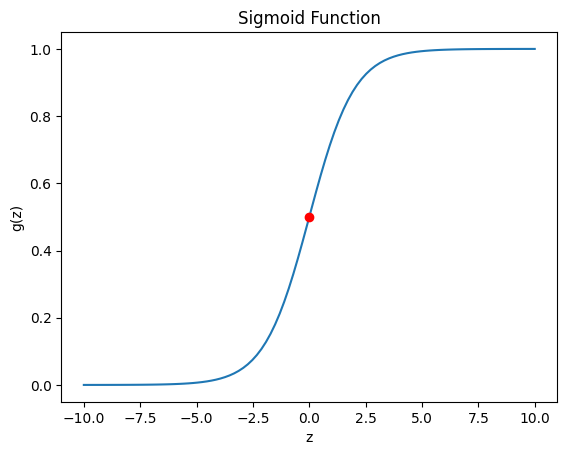

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# plot sigmoid function
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.plot(0, sigmoid(0), 'ro')
plt.xlabel("z")
plt.ylabel("g(z)")
plt.title("Sigmoid Function")
plt.show()

Let's get our hands dirty with some real data.

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
# X = breast_cancer_wisconsin_diagnostic.data.features 
# y = breast_cancer_wisconsin_diagnostic.data.targets 
data = breast_cancer_wisconsin_diagnostic.data

In [4]:
print(breast_cancer_wisconsin_diagnostic.variables)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

In [5]:
# Let's take a look at the data
# X.head()
data.features.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.targets.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


We'll do some preprocessing on the data before we can use it to train our model.

In [7]:
# 1. Handling missing values
data.features.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

No missing values!

In [23]:
X = data.features
y = data.targets

In [24]:
# 2. Encoding categorical variables
unique_values = y['Diagnosis'].unique()
print(unique_values)

['M' 'B']


The Cancer types are either Malignant (M) or Benign (B).
We can encode these values as 0 and 1.

In [25]:
# Let's encode the target variable
from sklearn.preprocessing import LabelEncoder

y = y.values.ravel()

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = pd.DataFrame(y_encoded)
y_encoded.head()

,0
0,1
1,1
2,1
3,1
4,1


In [26]:
# 3. normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [27]:
# 4. Feature Engineering
# We can add a column for the bias term
X['bias'] = 1

In [28]:
# 5. Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [29]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

Algorithm Overview
===================
We know that logistic regression models the probability that a given input x belongs to the positive class.
p(x) = σ(x⋅θ)
where σ is the sigmoid function, θ contains the model's weights, and x is the input features.

The goal here, again, is to minimize the cost function, or to optimize the weights θ.
The cost function for logistic regression is defined as:
    J(θ)=(−1/m) * ∑i = 1/m * [y(i)log(hθ(x(i))) + (1−y(i))log(1−hθ(x(i)))]
where hθ(x) is the sigmoid function, and y is the true label.

To minimize the cost function, we use gradient descent.
The gradient of the cost function is a vector of the same length as θ where the jth element (for j = 0, 1, ..., n) is defined as follows:
    ∂J(θ)/∂θj = (1/m) * ∑i = 1/m * (hθ(x(i))−y(i))x(i)j
    
The gradient descent algorithm is (as we saw in the previous notebook):
    Repeat until convergence {
        θj = θj − α * ∂J(θ)/∂θj
    }
where α is the learning rate.

In [15]:
def compute_cost(X, y, theta):
    predictions = sigmoid(np.dot(X, theta))
    cost = -y * np.log(predictions) - (1 - y) * np.log(1 - predictions)
    return np.mean(cost)

def train(X, y, epochs=1000, lr=0.01, tolerance=1e-7):
    theta = np.zeros(X.shape[1])
    for epoch in range(epochs):
        # compute gradient
        z = np.dot(X, theta)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (predictions - y)) / y.size
        # gradient descent
        theta -= lr * gradient
        
        # Optional: Compute the cost to check for convergence
        if epoch % 100 == 0:
            cost = compute_cost(X, y, theta)
            print(f"Epoch {epoch}: Cost {cost}")
            if np.linalg.norm(gradient) < tolerance:
                print("Convergence reached.")
                break
    return theta

In [30]:
# Train the model
theta = train(X_train, y_train)

Epoch 0: Cost 0.6738011219401827
Epoch 100: Cost 0.25117767284239706
Epoch 200: Cost 0.18927336093080016
Epoch 300: Cost 0.16126523675306437
Epoch 400: Cost 0.14467915001620726
Epoch 500: Cost 0.13346656889488412
Epoch 600: Cost 0.12525623283778592
Epoch 700: Cost 0.11891557163278883
Epoch 800: Cost 0.11382988915723184
Epoch 900: Cost 0.10963398265071915


In [31]:
def predict(X, theta):
    return sigmoid(np.dot(X, theta))

def accuracy(y_true, y_pred):
    return np.mean(y_true == (y_pred > 0.5))

y_pred = predict(X_test, theta)
acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")
print(f"Model weights: {theta}")

Accuracy: 0.9912280701754386
Model weights: [ 0.37522937  0.36006938  0.37107979  0.37113421  0.15591433  0.13275051
  0.28928913  0.39138848  0.09339357 -0.1497156   0.32934913  0.01345871
  0.27531747  0.29989143  0.00308254 -0.11363218 -0.093067    0.04782715
 -0.0757411  -0.19622723  0.43974159  0.43492227  0.41869554  0.41332874
  0.30778806  0.20946152  0.29105911  0.39796251  0.30886471  0.09375225
 -0.32651039]


Decision Boundary
==================
How does the logistic regression model determine y = 0 or y = 1?
One common way is to pick a threshold value, say 0.5.

y > 0.5 ==> g(z) > 0.5 ==> z > 0 ==> w.x + b > 0  --> y = 1

we can also use polynomial features to fit a more complex decision boundary.

Cost Function for Logistic Regression
=====================================
We remember from the previous notebooks that the cost function for linear regression is:
    J(θ) = (1/2m) * ∑(hθ(x(i)) - y(i))^2
    which is a convex function.
But applying this 'squared error' cost function to logistic regression results in a non-convex function.

The logistic cost function:
    J(θ) = (−1/m) * ∑i = 1/m * [y(i)log(hθ(x(i))) + (1−y(i))log(1−hθ(x(i)))] = 1/m * Loss(hθ(x), y)
    which is derived from MLE (Maximum Likelihood Estimation).
    
This cost function is convex, and we can use gradient descent to minimize it.
Note: Logistic regression has a non-linear nature, thus the squared error cost function is not a suitable choice.
Note2: The two log terms in the cost function combined make a convex function.

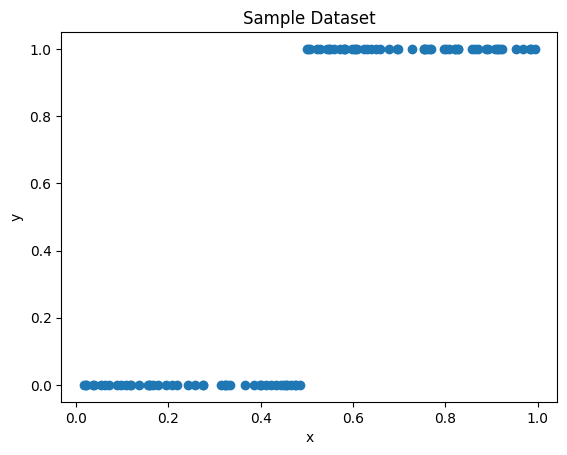

In [37]:
# sample dataset
x_train_sample = np.random.rand(100, 1)
y_train_sample = np.zeros(x_train_sample.shape)
y_train_sample[x_train_sample > 0.5] = 1

plt.scatter(x_train_sample, y_train_sample)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sample Dataset")
plt.show()

In [38]:
x_train_sample = np.hstack((np.ones((x_train_sample.shape[0], 1)), x_train_sample))
y_train_sample = y_train_sample.reshape(-1)
# print(x_train.shape, y_train.shape)
sample_theta = train(x_train_sample, y_train_sample, epochs=1000, lr=0.1)

Epoch 0: Cost 0.6910531844728419
Epoch 100: Cost 0.5836550448667456
Epoch 200: Cost 0.515137523448158
Epoch 300: Cost 0.4633845000192619
Epoch 400: Cost 0.42341546628616217
Epoch 500: Cost 0.39183902199660914
Epoch 600: Cost 0.3663535683791075
Epoch 700: Cost 0.3453831508032391
Epoch 800: Cost 0.3278306198694865
Epoch 900: Cost 0.31291712190700877


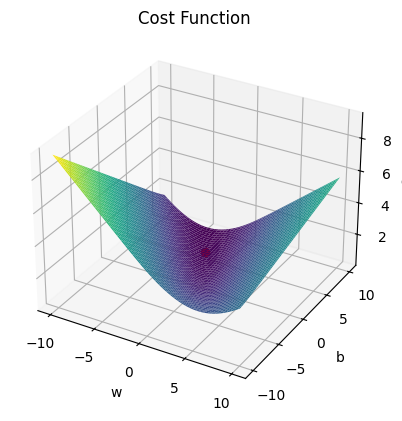

In [39]:
# plot a 3D surface plot of the cost function
w_vals = np.linspace(-10, 10, 100)
b_vals = np.linspace(-10, 10, 100)
w_vals, b_vals = np.meshgrid(w_vals, b_vals)
cost_vals = np.zeros(w_vals.shape)

for i in range(w_vals.shape[0]):
    for j in range(w_vals.shape[1]):
        theta_ = np.array([w_vals[i, j], b_vals[i, j]])
        cost_vals[i, j] = compute_cost(x_train_sample, y_train_sample, theta_)
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_vals, b_vals, cost_vals, cmap='viridis')
ax.plot(sample_theta[0], sample_theta[1], compute_cost(x_train_sample, y_train_sample, sample_theta), marker='o', color='r')
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Cost")
plt.title("Cost Function")
plt.show()

Gradient Descent
================
The gradient descent algorithm is used to minimize the cost function.
The algorithm is as follows:
    Repeat until convergence {
        θj = θj − α * ∂J(θ)/∂θj
    }
where α is the learning rate.
The gradient of the cost function is a vector of the same length as θ where the jth element (for j = 0, 1, ..., n) is defined as follows:
    ∂J(θ)/∂θj = (1/m) * ∑i = 1/m * (hθ(x(i))−y(i))x(i)j
    
This might look like the gradient of the cost function for linear regression, but the hypothesis function is different.
For linear regression:
    hθ(x) = θ.T * x
For logistic regression:
    hθ(x) = σ(θ.T * x) where σ is the sigmoid function.

Sci-kit Learn
=============
sklearn.linear_model.LogisticRegression: Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

# convert feature names to string
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(X_test)

acc = accuracy(y_test, y_pred)
print(f"Accuracy: {acc}")
print(f'weights: {model.coef_}')

print(f'previously calculated weights: {theta}')

Accuracy: 0.9736842105263158
weights: [[ 0.43385842  0.39588104  0.39527833  0.47155765  0.07034567 -0.52883
   0.80888432  1.10998321 -0.24166915 -0.07612554  1.24981728 -0.18852357
   0.59026575  0.92166659  0.31893953 -0.67177095 -0.17014564  0.31406572
  -0.50391427 -0.61235019  0.87431622  1.36067805  0.58625824  0.84011595
   0.53856512 -0.01049082  0.95023297  0.78415751  1.19593056  0.17081903
  -0.02262192]]
previously calculated weights: [ 0.37522937  0.36006938  0.37107979  0.37113421  0.15591433  0.13275051
  0.28928913  0.39138848  0.09339357 -0.1497156   0.32934913  0.01345871
  0.27531747  0.29989143  0.00308254 -0.11363218 -0.093067    0.04782715
 -0.0757411  -0.19622723  0.43974159  0.43492227  0.41869554  0.41332874
  0.30778806  0.20946152  0.29105911  0.39796251  0.30886471  0.09375225
 -0.32651039]
